# Esempio soluzione Prima Prova Esonero - Metodi AI e Machine Learning per la fisica
### 22.04.2021 - AA 2020/21 - Docente: S. Giagu


> **Regole:**

*   **tempo a disposizione:** 2h30'

*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito* usando questo notebook
*   una volta completato il compito sottomettere il notebook nel apposito folder sul sito e-learning del corso disponibile al link: [consegna esonero](https://elearning.uniroma1.it/mod/assign/view.php?id=393203)(NOTA BENE: una volta sottomesso il notebook non sono più possibili ulteriori modifiche)

*   **NOTA:** gli studenti che usufruiscono di strumenti compensativi devono risolvere i quesiti da 1 a 4 incluso, gli altri studenti devono risolvere tutti i quesiti assegnati  

In [1]:
#@ Dati Personali
import os

Nome = 'Stefano'  #@param {type: "string"}
Cognome = 'Giagu' #@param {type: "string"}
NumeroMatricola = 12345679 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!')
else:
  print('Downloading datasets')
  !rm -rf dati_ES1_2021.csv.gz labels_ES1_2021.csv.gz
  !rm -rf dati_ES1_2021.csv labels_ES1_2021.csv
  !wget http://giagu.web.cern.ch/giagu/CERN/dati_ES1_2021.csv.gz
  !wget http://giagu.web.cern.ch/giagu/CERN/labels_ES1_2021.csv.gz
  !gunzip dati_ES1_2021.csv.gz
  !gunzip labels_ES1_2021.csv.gz
  print('Done')

--2023-07-01 12:16:06--  http://giagu.web.cern.ch/giagu/CERN/dati_ES1_2021.csv.gz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.184.21.205, 2001:1458:d00:34::100:59
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.184.21.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14659424 (14M) [application/gzip]
Saving to: ‘dati_ES1_2021.csv.gz’

dati_ES1_2021.csv.g 100%[===================>]  13.98M  1.77MB/s    in 14s     

2023-07-01 12:16:20 (1.03 MB/s) - ‘dati_ES1_2021.csv.gz’ saved [14659424/14659424]

--2023-07-01 12:16:20--  http://giagu.web.cern.ch/giagu/CERN/labels_ES1_2021.csv.gz
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.184.21.205, 2001:1458:d00:34::100:59
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.184.21.205|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196808 (192K) [application/gzip]
Saving to: ‘labels_ES1_2021.csv.gz’

labels_ES1_2021.csv 100%[===================>] 192.20K   490KB/s  

# Descrizione del compito:

### Dataset:

il dataset fornito è costituito da due file formato *.csv*: *dati_ES1_2021.csv* e *labels_ES1_2021.csv*
*   *dati_ES1_2021*: contiene in formato tabulare un dataset costituito da 581012 eventi ciascuno descritto da 54 feature di alto livello
*   *labels_ES1_2021*: contiene in formato tabulare una label di classe per ciascuno degli eventi contenuti nel file precedente. Sono presenti 7 classi con label [1,2,3,4,5,6,7]

**È richiesto:**

1.   di effettuare una rapida analisi iniziale delle caratteristiche principali del campione fornito, commentando su quelle che riteniate più importanti
2.   di costruire un campione di training e uno di test, con feature normalizzate, e in modo che i campioni risultino bilanciati in termini di eventi appartenenti alla diverse classi
3.   di identificare le 5 feature con maggiore potere discriminante rispetto agli eventi delle differenti classi utilizzando il modello di sklearn: *sklearn.ensemble.ExtraTreesClassifier*
4.   di allenare ed ottimizzare rispetto alla massima prestazione raggiungibile, un classificatore tipo random forest sia utilizzando tutte le 54 feature disponibili, riportando le prestazioni del classificatore

In [2]:
import numpy as np
import pandas as pd

In [3]:
#lettura dataset
df1 = pd.read_csv('dati_ES1_2021.csv')
df2 = pd.read_csv('labels_ES1_2021.csv')

come prima cosa guardo alla statistica descrittiva del dataset dal punto di vista delle feature: tabella delle feature, statistica di base, correlazioni

In [4]:
#printout dataset
df1

,quota,aspetto,angolo,h_dist,v_dist,h_dist2,omb9,omb12,omb15,h_dist3,...,tipo30,tipo31,tipo32,tipo33,tipo34,tipo35,tipo36,tipo37,tipo38,tipo39
0,2710.0,79.0,1.0,242.0,3.0,2054.0,220.0,236.0,152.0,4327.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3121.0,67.0,9.0,201.0,21.0,2348.0,229.0,222.0,125.0,1611.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2948.0,37.0,17.0,210.0,27.0,2165.0,217.0,202.0,115.0,2163.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3368.0,258.0,26.0,85.0,22.0,5101.0,148.0,244.0,228.0,972.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3455.0,9.0,6.0,553.0,116.0,1731.0,213.0,227.0,152.0,1282.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,3445.0,0.0,8.0,481.0,106.0,1682.0,209.0,226.0,155.0,1284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
581008,3349.0,159.0,8.0,127.0,-14.0,2954.0,229.0,242.0,145.0,591.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
581009,3224.0,20.0,13.0,899.0,99.0,2136.0,210.0,211.0,136.0,2255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
581010,3283.0,81.0,11.0,755.0,135.0,6241.0,235.0,219.0,114.0,1924.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#printout labels
df2

,Label
0,2
1,1
2,1
3,1
4,7
...,...
581007,7
581008,7
581009,7
581010,2


In [6]:
#caratteristiche globali features
df1.describe()

,quota,aspetto,angolo,h_dist,v_dist,h_dist2,omb9,omb12,omb15,h_dist3,...,tipo30,tipo31,tipo32,tipo33,tipo34,tipo35,tipo36,tipo37,tipo38,tipo39
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


le feature non hanno tutte lo stesso range dinamico, quindi andranno normalizzate per colonne per l'analisi PCA e anche per poi essere utilizzate nell'addestramento dei classificatori ...

In [7]:
#matrice di correlazione
df1.corr()

,quota,aspetto,angolo,h_dist,v_dist,h_dist2,omb9,omb12,omb15,h_dist3,...,tipo30,tipo31,tipo32,tipo33,tipo34,tipo35,tipo36,tipo37,tipo38,tipo39
quota,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612
aspetto,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866
angolo,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637
h_dist,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020
v_dist,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006
h_dist2,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052
omb9,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,-0.035114,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016
omb12,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,-0.000095,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176
omb15,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.040475,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254
h_dist3,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.066258,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915


data la dimensionalità della matrice non è ovvio desumere informazioni chiare sulle correlazioni, sono comunque presenti sia variabili con correlazioni significative (O(50%), sia variabili non correlate ...

Passiamo ora all'analisi dei target (label) per capire se il campione è bilanciato dal punto di vista delle classi rappresentate ...

[211840. 283301.  35754.   2747.   9493.  17367.  20510.]
[0.36460521 0.48759922 0.06153746 0.00472796 0.01633873 0.02989095
 0.03530048]


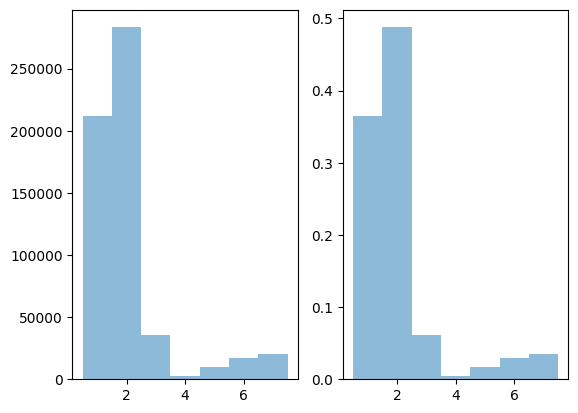

In [8]:
# analisi visuale delle label (histogramma delle frequenze)
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
n1, bins1, _ = plt.hist(df2.values, bins=7,  density=False, alpha=0.5, range=[0.5,7.5], )
print(n1)
plt.subplot(1,2,2)
n, bins, _ = plt.hist(df2.values, bins=7,  density=True, alpha=0.5, range=[0.5,7.5], )
print(n)

il campione è altamente sbilanciato (le diverse classi non sono rappresentate in modo uniforme)

Per le task di classificazione è importante bilanciare il dataset per evitare che le classi dominanti forzino il classificatore di identificare con alta accuracuy solo queste ultime ...

In [9]:
#costruzione di dataset bilanciato via undersampling
# visto che la statistica della classe meno frequente è sufficientemente alta (2747 eventi)
# si puo' usare una tecnica di undersamping prendendo 2747 eventi da ogni classe

#
data = df1.values
label = df2.values
label = np.reshape(label, (label.shape[0]))

print(data.shape)
print(label.shape)

ind0 = np.argmin(n1)+1 #label meno numerosa #label go from 1 to 7
size0 = int(n1[3])
X_rus = data[label==ind0]
y_rus = label[label==ind0]
print(X_rus.shape, y_rus.shape)
size0 = y_rus.shape[0]
for lab in range(1,8):
   if lab==ind0:
     continue
   X_rus = np.concatenate((X_rus, (data[label==lab])[:size0]), axis=0)
   y_rus = np.concatenate((y_rus, (label[label==lab])[:size0]), axis=0)

print(X_rus.shape, y_rus.shape)

(581012, 54)
(581012,)
(2747, 54) (2747,)
(19229, 54) (19229,)


In [10]:
# oppure poteva anche essere fatto in modo automatico e campionando random le classi più numerose
# usando la libreria imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
# resampling X, y
X_rus, y_rus = rus.fit_resample(df1.values, df2.values.reshape(-1))
print(X_rus.shape, y_rus.shape)

(19229, 54) (19229,)


[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5]


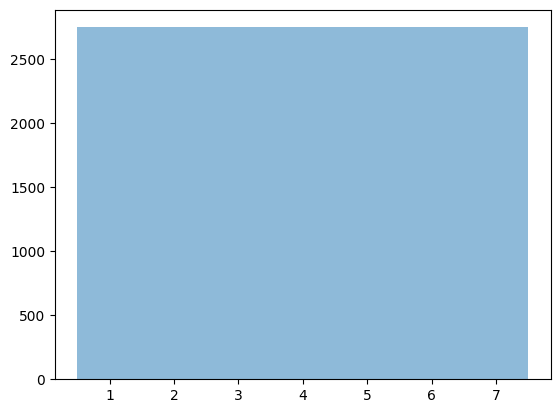

In [11]:
#controllo che il campione X_rus, y_rus risulti bilanciato
n, bins, _ = plt.hist(y_rus, bins=7,  density=False, alpha=0.5, range=[0.5,7.5], )
print(bins)

In [12]:
#split dei campioni in training/test

from sklearn.model_selection import train_test_split
train_to_test_ratio=0.8 # training sample 80%

# selezioniamo random data points dai campioni ordinati e disordinati per creare training e test
X_train, X_test, Y_train, Y_test = train_test_split(X_rus,y_rus, train_size=train_to_test_ratio, shuffle=True, random_state=1234)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)


X_train shape: (15383, 54)
Y_train shape: (15383,)
X_test shape: (3846, 54)
Y_test shape: (3846,)


In [13]:
#normalizzazione delle feature

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X_train_n = transformer.fit_transform(X_train)
X_test_n = transformer.transform(X_test)

Feature ranking:
1. feature 0 (0.166238)
2. feature 5 (0.080597)
3. feature 9 (0.067545)
4. feature 13 (0.061893)
5. feature 3 (0.057813)
6. feature 1 (0.049611)
7. feature 6 (0.049392)
8. feature 4 (0.049317)
9. feature 8 (0.044840)
10. feature 7 (0.044795)
11. feature 2 (0.041867)
12. feature 23 (0.029702)
13. feature 51 (0.025126)
14. feature 52 (0.023047)
15. feature 16 (0.022992)
16. feature 12 (0.020279)
17. feature 10 (0.018745)
18. feature 17 (0.016414)
19. feature 53 (0.012663)
20. feature 43 (0.011950)
21. feature 30 (0.010442)
22. feature 15 (0.008687)
23. feature 26 (0.008630)
24. feature 35 (0.007874)
25. feature 36 (0.007506)
26. feature 42 (0.006976)
27. feature 25 (0.005840)
28. feature 45 (0.004875)
29. feature 46 (0.004734)
30. feature 24 (0.004563)
31. feature 48 (0.004252)
32. feature 11 (0.004237)
33. feature 19 (0.003931)
34. feature 44 (0.003696)
35. feature 37 (0.003490)
36. feature 33 (0.002365)
37. feature 14 (0.002319)
38. feature 18 (0.002193)
39. feature 27

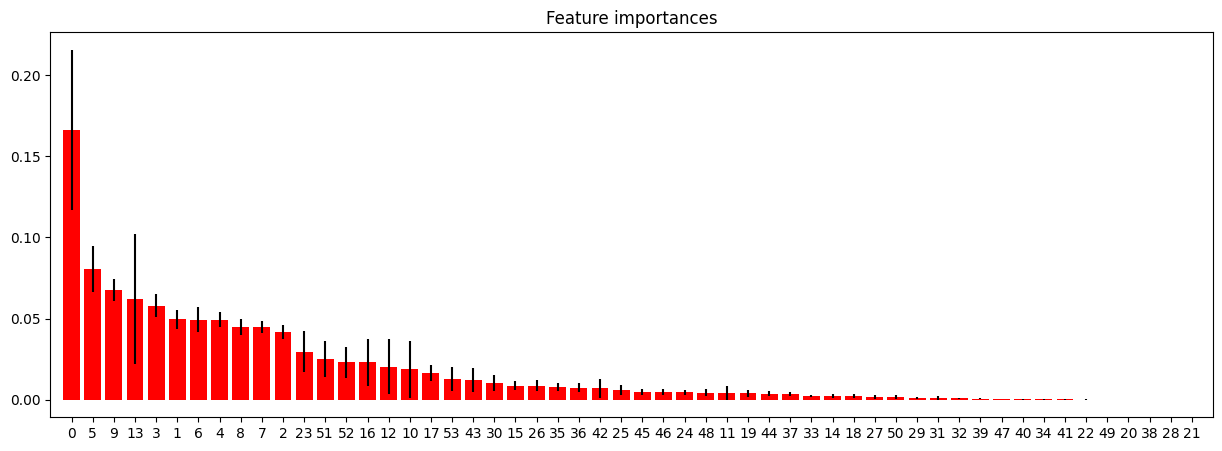

In [14]:
# ranking delle variabili

# utilizzo un ExtraTreesClassifier che risulta meno biased rispetto ad una RandomForest (una RandomForest sarebbe
# anche andata bene

# applico l'analisi di ranking solo sul training set per evitare leaks sul test set e
# prestazioni biased nella fase di test dei classificatori

from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=200,
                              random_state=0)


forest.fit(X_train_n, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_n.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_train_n.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_n.shape[1]), indices)
plt.xlim([-1, X_train_n.shape[1]])
plt.show()

la feature 0 è quella con maggior potere discriminante, le successive 5-10 features hanno simile importanza  e le successive risultano via via meno significative dal punto di vista del potere discriminante

In [15]:
# le prime 5 features in ordine di importanza sono:
features = list(df1.columns)
print([features[j] for j in indices[:5]])

['quota', 'h_dist2', 'h_dist3', 'area3', 'h_dist']


In [16]:
#funzione per stampare in modo pulito la confusion matrix
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()

    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

Implementiamo un classificatore RandomForest con una grid search di due iperparametri significativi del modello dal punto di vista del suo potere espressivo (il numero di alberi e il min samples split).

Ci basiamo sull'OOB score per decidere il set di ierparametri ottimale che poi testeremo sul test set

In [17]:
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
#disabilitiamo messaggi di warning
warnings.filterwarnings("ignore")

#Valore del numero di alberi
n_estimator_range=np.linspace(2,200,10, dtype='int')
leaf_size_range=[10,100,1000]

m=len(n_estimator_range)
n=len(leaf_size_range)

#Allocate Arrays for various quantities
RFC_OOB_accuracy=np.zeros((n,m))
RFC_train_accuracy=np.zeros((n,m))
RFC_vali_accuracy=np.zeros((n,m))
run_time=np.zeros((n,m))

best_score = 0

for i, leaf_size in enumerate(leaf_size_range):
    # Define Random Forest Classifier
    myRF_clf = RandomForestClassifier(
        n_estimators=n_estimator_range[0],
        max_depth=None,
        min_samples_split=leaf_size, # minimum number of sample per leaf
        oob_score=True,
        random_state=0,
        warm_start=True # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    )
    for j, n_estimator in enumerate(n_estimator_range):

        start_time = time.time()
        myRF_clf.set_params(n_estimators=n_estimator)
        myRF_clf.fit(X_train_n, Y_train)
        run_time[i,j] = time.time() - start_time

    # check accuracy
        RFC_train_accuracy[i,j]=myRF_clf.score(X_train_n, Y_train)
        RFC_OOB_accuracy[i,j]=myRF_clf.oob_score_
        if best_score <= myRF_clf.oob_score_:
            best_score =  myRF_clf.oob_score_
            print('accuracy improved')
            print('n_estimators: %i, leaf_size: %i'%(n_estimator,leaf_size))
            result = (run_time[i,j], RFC_train_accuracy[i,j], RFC_OOB_accuracy[i,j])
            print('{0:<15}{1:<15}{2:<15}'.format("time (s)","train score", "OOB estimate"))
            print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))

accuracy improved
n_estimators: 2, leaf_size: 10
time (s)       train score    OOB estimate   
0.0544         0.8725         0.4885         
accuracy improved
n_estimators: 24, leaf_size: 10
time (s)       train score    OOB estimate   
0.5010         0.9621         0.8299         
accuracy improved
n_estimators: 46, leaf_size: 10
time (s)       train score    OOB estimate   
0.7431         0.9663         0.8441         
accuracy improved
n_estimators: 68, leaf_size: 10
time (s)       train score    OOB estimate   
1.0133         0.9682         0.8475         
accuracy improved
n_estimators: 90, leaf_size: 10
time (s)       train score    OOB estimate   
1.0675         0.9690         0.8499         
accuracy improved
n_estimators: 134, leaf_size: 10
time (s)       train score    OOB estimate   
1.0435         0.9701         0.8502         
accuracy improved
n_estimators: 156, leaf_size: 10
time (s)       train score    OOB estimate   
0.7527         0.9701         0.8525         
accur

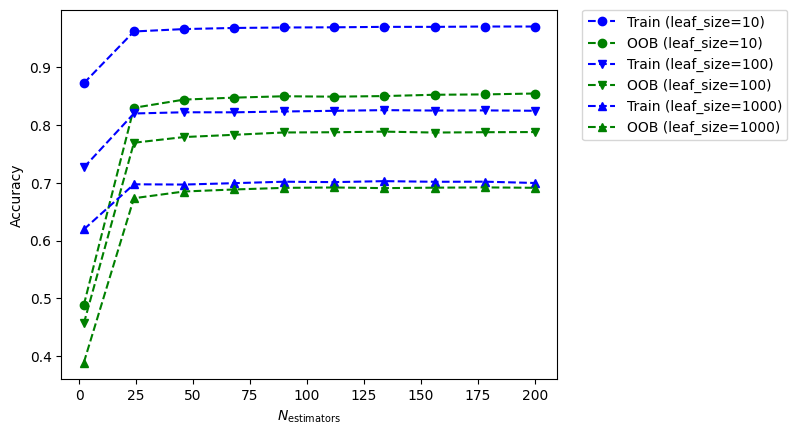

In [18]:
lege = ['o','v','^']
plt.figure()
for leaf in range(n):
  plt.plot(n_estimator_range,RFC_train_accuracy[leaf],'--b'+lege[leaf],label='Train (leaf_size='+str(leaf_size_range[leaf])+')')
  plt.plot(n_estimator_range,RFC_OOB_accuracy[leaf],'--g'+lege[leaf],label='OOB (leaf_size='+str(leaf_size_range[leaf])+')')

plt.xlabel('$N_\mathrm{estimators}$')
plt.ylabel('Accuracy')
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

dall'andamento si evince come il modello raggiunge un plateau gia con circa 75-100 alberi, inoltre valori del min_leaf_size sopra 100 mostrano un alto livello di overtraining.

Scegliamo min_leaf_size=10 e n_estimator=100 e ottimizziamo in modo fine intorno a questi valori ...

In [20]:
from sklearn.ensemble import RandomForestClassifier
import time
import warnings
#disabilitiamo messaggi di warning
warnings.filterwarnings("ignore")

#Valore del numero di alberi
n_estimator_range=np.linspace(90,130,20, dtype='int')
leaf_size_range=[8,10,12]

m=len(n_estimator_range)
n=len(leaf_size_range)

#Allocate Arrays for various quantities
RFC_OOB_accuracy=np.zeros((n,m))
RFC_train_accuracy=np.zeros((n,m))
RFC_vali_accuracy=np.zeros((n,m))
run_time=np.zeros((n,m))

best_score = 0

for i, leaf_size in enumerate(leaf_size_range):
    # Define Random Forest Classifier
    myRF_clf = RandomForestClassifier(
        n_estimators=n_estimator_range[0],
        max_depth=None,
        min_samples_split=leaf_size, # minimum number of sample per leaf
        oob_score=True,
        random_state=0,
        warm_start=True # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
    )
    for j, n_estimator in enumerate(n_estimator_range):

        start_time = time.time()
        myRF_clf.set_params(n_estimators=n_estimator)
        myRF_clf.fit(X_train_n, Y_train)
        run_time[i,j] = time.time() - start_time

    # check accuracy
        RFC_train_accuracy[i,j]=myRF_clf.score(X_train_n, Y_train)
        RFC_OOB_accuracy[i,j]=myRF_clf.oob_score_
        if best_score <= myRF_clf.oob_score_:
            best_score =  myRF_clf.oob_score_
            print('accuracy improved')
            print('n_estimators: %i, leaf_size: %i'%(n_estimator,leaf_size))
            result = (run_time[i,j], RFC_train_accuracy[i,j], RFC_OOB_accuracy[i,j])
            print('{0:<15}{1:<15}{2:<15}'.format("time (s)","train score", "OOB estimate"))
            print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))

accuracy improved
n_estimators: 90, leaf_size: 8
time (s)       train score    OOB estimate   
2.5576         0.9780         0.8522         
accuracy improved
n_estimators: 92, leaf_size: 8
time (s)       train score    OOB estimate   
0.3411         0.9784         0.8522         
accuracy improved
n_estimators: 94, leaf_size: 8
time (s)       train score    OOB estimate   
0.1961         0.9782         0.8522         
accuracy improved
n_estimators: 96, leaf_size: 8
time (s)       train score    OOB estimate   
0.2730         0.9784         0.8524         
accuracy improved
n_estimators: 98, leaf_size: 8
time (s)       train score    OOB estimate   
0.2622         0.9788         0.8533         
accuracy improved
n_estimators: 100, leaf_size: 8
time (s)       train score    OOB estimate   
0.2856         0.9785         0.8535         
accuracy improved
n_estimators: 106, leaf_size: 8
time (s)       train score    OOB estimate   
0.2189         0.9787         0.8536         
accuracy im

In [21]:
# testiamo le prestazioni del modello corrispondente ai parametri migliori ottenuti con
# la grid search.
myRF_clf = RandomForestClassifier(
        n_estimators=125,
        max_depth=None,
        min_samples_split= 8,
        oob_score=True,
        #class_weight=class_weight_dict,
        random_state=0)

myRF_clf.fit(X_train_n, Y_train)
RFC_test_accuracy=myRF_clf.score(X_test_n,Y_test)
RFC_train_accuracy=myRF_clf.score(X_train_n,Y_train)
RFC_OOB_accuracy=myRF_clf.oob_score_
result = (RFC_train_accuracy, RFC_OOB_accuracy, RFC_test_accuracy)
print('{0:<15}{1:<15}{2:<15}'.format("train score", "OOB estimate", "test score"))
print('{0:<15.4f}{1:<15.4f}{2:<15.4f}'.format(*result))

train score    OOB estimate   test score     
0.9788         0.8552         0.8609         


In [22]:
pred_test= myRF_clf.predict(X_test_n)

from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(Y_test, pred_test, normalize='true')
labels = ['1','2','3','4','5','6','7']
print_cm(c_mat, labels)

              1     2     3     4     5     6     7 
        1  0.79  0.15  0.00  0.00  0.02  0.00  0.04 
        2  0.20  0.64  0.04  0.00  0.08  0.04  0.00 
        3  0.00  0.01  0.85  0.04  0.01  0.10  0.00 
        4  0.00  0.00  0.01  0.98  0.00  0.01  0.00 
        5  0.00  0.04  0.02  0.00  0.94  0.00  0.00 
        6  0.00  0.01  0.08  0.03  0.00  0.87  0.00 
        7  0.03  0.00  0.00  0.00  0.00  0.00  0.97 
